## Problem 2: Calculate and visualise the *dominance areas* of shopping centres (10 points)

In this problem, the aim is to delineate the dominance area of each shopping centre. For this 
exercise, we define the ‘dominance area’ of a shopping centre as the area from which it can 
be reached faster than other shopping centres. We will use public transport travel times.

![](images/dominance_areas_example_1000x500px.png)

*Sample result: a map showing the areas of dominance of each shopping centre, and the travel 
times to the closest shopping centre in the entire metropolitan area*



---

### Data

The **input data** is identical to what you have used for *problem 1*, 
see [there](./Exercise-4-problem-1.ipynb) for detailed data descriptions.

---


### An overview of the tasks

This task comprises of three major subtasks. In contrast to earlier exercises, we 
do not provide a detailed, step-by-step ‘cooking recipe’. Rather, you are free to
implement the necessary steps in any order you see fit, and choose any variable
names of your liking. 

To test intermediate results, implement `assert` statements, output the `head()`
of a data frame, or plot the data. Remember to add comments to all of your code,
so future you (and us) can understand what each section does.

The **only strict requirement** is the **file name** of
the **output** map plot: `DATA_DIRECTORY / "dominance_areas.png"`.

1. Load the YKR grid and the individual travel time data sets, and combine them 
   into one geo data frame. This is essentially the same as *problem 1*, except
   that you must load all eight shopping centre data files.
2. Find the closest shopping centre to each grid cell. In the combined data set,
   find the minimum travel time to any of the shopping centres, save the value in
   a new column, and shopping centre name in another new column.
   See the [hints](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-4/exercise-4.html#hints)
   to this exercise for a suggestions on how to achieve this 
   ([`pandas.DataFrame.min()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.min.html) and
   [`pandas.DataFrame.idxmin()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html)
   will be helpful)
3. Visualise the dominance areas and travel times. Use 2⨉1 subplots to plot
   the most dominant (closest) shopping centre for each grid cell, and the
   travel time to the closest shopping centre for each grid cell.

---


In [63]:
import pathlib 
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data"

In [64]:
# ADD YOUR OWN CODE HERE
# For Areas of dominance of shopping centers (area reached faster than other with public transportation)
# 1. Import YKR_grid_EPSG3067.gpkg as grid as GeoDataFrame
# 2. For each file in the data dir
#    2a. If the file name starts with "travel_times_to_" and with file extension .txt:
#        2aa. import the txt as GeoDataFrame gdf
#        2ab. grid join with txt["from id", "to id", "pt_r_t"] based on YKR_ID and  from id
#        2ac. Rename pt_r_t col to pt_r_t_place, where place is the last ele of doc name list sep by _ 
#        2ad. Drop duplicate column
# 3. Create a customer classifier, which find the minimum of columns with name pt_r_t_place
# 4. The classifier should return the minimum time and place with minimum time
# 5. Apply the classifier to grid to add column area_of_dominance and min_travel_time respect to the minimum time and place with minimum time

In [65]:
import geopandas as gpd
import pandas as pd
import numpy as np
import mapclassify
import matplotlib.pyplot as plt

In [73]:
# ADD YOUR OWN CODE HERE
# Import YKR_grid_EPSG3067.gpkg as grid as GeoDataFrame
grid = gpd.read_file(DATA_DIRECTORY / "YKR_grid_EPSG3067.gpkg")
grid.head()

,YKR_ID,geometry
0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


In [75]:
# ADD YOUR OWN CODE HERE
# 2. For each file in the data dir
for full_filename in DATA_DIRECTORY.iterdir():
    filename = str(full_filename).split("/")[-1]
    if (filename.startswith("travel_times_to_") and filename.endswith(".txt")):
        shopping_centres = filename.split("_")[-1].split(".")[0]
        travel_times_to = pd.read_csv(DATA_DIRECTORY / filename, sep=";")
        travel_times_to["pt_r_t"] = travel_times_to["pt_r_t"].replace({-1: np.nan})
        travel_times_to["from_id"] = travel_times_to["from_id"].replace({-1: np.nan})
        grid = pd.merge(grid, travel_times_to.loc[: ,["from_id", "pt_r_t"]], left_on="YKR_ID", right_on="from_id")
        grid = grid.rename(columns={
            "pt_r_t": ("pt_r_t_" + shopping_centres) 
        })
        grid = grid.drop(columns=["from_id_x", "from_id_y", "to_id_x", "to_id_y"], errors="ignore")
grid

,YKR_ID,geometry,pt_r_t_Dixi,pt_r_t_Jumbo,pt_r_t_Ruoholahti,pt_r_t_Myyrmanni,pt_r_t_Forum,pt_r_t_Omena,pt_r_t_Itis,pt_r_t_Dixi,pt_r_t_Jumbo,pt_r_t_Ruoholahti,pt_r_t_Myyrmanni,pt_r_t_Forum,pt_r_t_Omena,pt_r_t_Itis
0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",102.0,101.0,118.0,90.0,110.0,141.0,132.0,102.0,101.0,118.0,90.0,110.0,141.0,132.0
1,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",109.0,108.0,121.0,93.0,113.0,143.0,135.0,109.0,108.0,121.0,93.0,113.0,143.0,135.0
2,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",111.0,109.0,123.0,95.0,115.0,145.0,137.0,111.0,109.0,123.0,95.0,115.0,145.0,137.0
3,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",115.0,114.0,127.0,99.0,119.0,149.0,141.0,115.0,114.0,127.0,99.0,119.0,149.0,141.0
4,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",99.0,98.0,111.0,83.0,103.0,134.0,125.0,99.0,98.0,111.0,83.0,103.0,134.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13226,6016698,"POLYGON ((373000.000 6665500.000, 372750.000 6...",79.0,109.0,48.0,95.0,52.0,38.0,79.0,79.0,109.0,48.0,95.0,52.0,38.0,79.0
13227,6016699,"POLYGON ((373250.000 6665500.000, 373000.000 6...",81.0,110.0,50.0,97.0,54.0,40.0,81.0,81.0,110.0,50.0,97.0,54.0,40.0,81.0
13228,6018252,"POLYGON ((372500.000 6665250.000, 372250.000 6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13229,6018253,"POLYGON ((372750.000 6665250.000, 372500.000 6...",84.0,114.0,53.0,100.0,57.0,43.0,84.0,84.0,114.0,53.0,100.0,57.0,43.0,84.0


In [102]:
# 3. Create a customer classifier, which find the minimum of columns with name pt_r_t_place
# 4. The classifier should return the minimum time and place with minimum time
def grid_classifier(row):
    item = (None, np.nan)
    for col in row.items():
        if (type(col[0])==str and col[0].startswith("pt_r_t_") and (col[1]>0) and (np.isnan(item[1]) or col[1]<item[1])):
            item = (col[0].split("_")[-1], col[1])
    return pd.Series({"area_of_dominance_names": item[0], "area_of_dominance_time_minutes": item[1]})
grid[["area_of_dominance_names", "area_of_dominance_time_minutes"]] = grid.apply(grid_classifier, axis=1)
grid

,YKR_ID,geometry,pt_r_t_Dixi,pt_r_t_Jumbo,pt_r_t_Ruoholahti,pt_r_t_Myyrmanni,pt_r_t_Forum,pt_r_t_Omena,pt_r_t_Itis,pt_r_t_Dixi,pt_r_t_Jumbo,pt_r_t_Ruoholahti,pt_r_t_Myyrmanni,pt_r_t_Forum,pt_r_t_Omena,pt_r_t_Itis,area_of_dominance_names,area_of_dominance_time_minutes
0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",102.0,101.0,118.0,90.0,110.0,141.0,132.0,102.0,101.0,118.0,90.0,110.0,141.0,132.0,Myyrmanni,90.0
1,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",109.0,108.0,121.0,93.0,113.0,143.0,135.0,109.0,108.0,121.0,93.0,113.0,143.0,135.0,Myyrmanni,93.0
2,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",111.0,109.0,123.0,95.0,115.0,145.0,137.0,111.0,109.0,123.0,95.0,115.0,145.0,137.0,Myyrmanni,95.0
3,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",115.0,114.0,127.0,99.0,119.0,149.0,141.0,115.0,114.0,127.0,99.0,119.0,149.0,141.0,Myyrmanni,99.0
4,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",99.0,98.0,111.0,83.0,103.0,134.0,125.0,99.0,98.0,111.0,83.0,103.0,134.0,125.0,Myyrmanni,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13226,6016698,"POLYGON ((373000.000 6665500.000, 372750.000 6...",79.0,109.0,48.0,95.0,52.0,38.0,79.0,79.0,109.0,48.0,95.0,52.0,38.0,79.0,Omena,38.0
13227,6016699,"POLYGON ((373250.000 6665500.000, 373000.000 6...",81.0,110.0,50.0,97.0,54.0,40.0,81.0,81.0,110.0,50.0,97.0,54.0,40.0,81.0,Omena,40.0
13228,6018252,"POLYGON ((372500.000 6665250.000, 372250.000 6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13229,6018253,"POLYGON ((372750.000 6665250.000, 372500.000 6...",84.0,114.0,53.0,100.0,57.0,43.0,84.0,84.0,114.0,53.0,100.0,57.0,43.0,84.0,Omena,43.0


In [103]:
grid["area_of_dominance_names"] = grid["area_of_dominance_names"].replace({np.nan: None})
grid

,YKR_ID,geometry,pt_r_t_Dixi,pt_r_t_Jumbo,pt_r_t_Ruoholahti,pt_r_t_Myyrmanni,pt_r_t_Forum,pt_r_t_Omena,pt_r_t_Itis,pt_r_t_Dixi,pt_r_t_Jumbo,pt_r_t_Ruoholahti,pt_r_t_Myyrmanni,pt_r_t_Forum,pt_r_t_Omena,pt_r_t_Itis,area_of_dominance_names,area_of_dominance_time_minutes
0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",102.0,101.0,118.0,90.0,110.0,141.0,132.0,102.0,101.0,118.0,90.0,110.0,141.0,132.0,Myyrmanni,90.0
1,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",109.0,108.0,121.0,93.0,113.0,143.0,135.0,109.0,108.0,121.0,93.0,113.0,143.0,135.0,Myyrmanni,93.0
2,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",111.0,109.0,123.0,95.0,115.0,145.0,137.0,111.0,109.0,123.0,95.0,115.0,145.0,137.0,Myyrmanni,95.0
3,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",115.0,114.0,127.0,99.0,119.0,149.0,141.0,115.0,114.0,127.0,99.0,119.0,149.0,141.0,Myyrmanni,99.0
4,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",99.0,98.0,111.0,83.0,103.0,134.0,125.0,99.0,98.0,111.0,83.0,103.0,134.0,125.0,Myyrmanni,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13226,6016698,"POLYGON ((373000.000 6665500.000, 372750.000 6...",79.0,109.0,48.0,95.0,52.0,38.0,79.0,79.0,109.0,48.0,95.0,52.0,38.0,79.0,Omena,38.0
13227,6016699,"POLYGON ((373250.000 6665500.000, 373000.000 6...",81.0,110.0,50.0,97.0,54.0,40.0,81.0,81.0,110.0,50.0,97.0,54.0,40.0,81.0,Omena,40.0
13228,6018252,"POLYGON ((372500.000 6665250.000, 372250.000 6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
13229,6018253,"POLYGON ((372750.000 6665250.000, 372500.000 6...",84.0,114.0,53.0,100.0,57.0,43.0,84.0,84.0,114.0,53.0,100.0,57.0,43.0,84.0,Omena,43.0


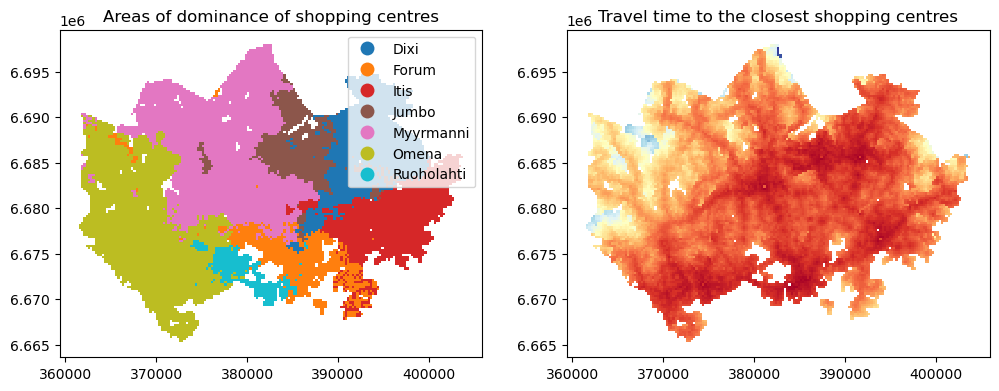

In [109]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax00 = axes[0]
ax01 = axes[1]
grid.plot(column="area_of_dominance_names", ax=ax00, legend=True)
grid.plot(column="area_of_dominance_time_minutes", ax=ax01, cmap="RdYlBu")
ax00.set_title("Areas of dominance of shopping centres")
ax01.set_title("Travel time to the closest shopping centres")
fig.savefig(DATA_DIRECTORY / "dominance_areas.png")

In [110]:
# NON-EDITABLE TEST CELL
# Check that output figure file exists
assert (DATA_DIRECTORY / "dominance_areas.png").exists()


--- 

**Do not forget to plot the result map, and save it to `DATA_DIRECTORY / "dominance_areas.png"`!**

---

## Reflections

This was a significantly more complex exercise that previous ones, and it included finding
a solution yourself. 

- What was most difficult part? 
- Where did you get stuck? 
- What was the easiest, and
- what was the most fun part of this exercise?

Add your answer below

What was most difficult part?

The most difficult part is to devise a plan to solve the problem accordingly. I tried to imagine the steps as detail as possible, but some part are still missing, leading to think while programming and solve the problem slower. Next time I should take a hierarchical approach, where the problem is first broken down into more general steps, then each general steps are further broken down into more detail steps etc.

Where did you get stuck?

I got stuck at step 3 and 4. Because I did not understand the output and its data structure, I have to print multiple times to see and understand the output. Once I understand the output and I can program accordingly.

What was the easiest?

The easiest part is plotting the GeoDataFrame, it is because it is one steps only, and the input and output do not change greatly in different case.

What was the most fun part of this exercise?

I do not find the exercise fun, but it is mental stimulating and rewarding. The most mental stimulating part is to plan and devise the solution for problem, because you have to think about it. The most rewarding part is the actual plotting step, because we have to see the final result.


---

## Well done!

Congratulations, you completed exercise 4. Good Job!